In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
with open("day_16_input_0.txt") as fname:
    map = fname.read()

In [3]:
map = map.splitlines()
map

['###############',
 '#.......#....E#',
 '#.#.###.#.###.#',
 '#.....#.#...#.#',
 '#.###.#####.#.#',
 '#.#.#.......#.#',
 '#.#.#####.###.#',
 '#...........#.#',
 '###.#.#####.#.#',
 '#...#.....#.#.#',
 '#.#.#.###.#.#.#',
 '#.....#...#.#.#',
 '#.###.#.#.#.#.#',
 '#S..#.....#...#',
 '###############']

In [4]:
maxcolumns = len(map[0])
maxrows = len(map)
print(maxcolumns,maxrows)

15 15


In [5]:
# get map into dictionary form
dictionary = {}

for y, line in enumerate(map):
    for x, char in enumerate(line):
        dictionary[(x,y)] = char

In [6]:
# find the start
x, y = [coord for coord in dictionary if dictionary[coord] == "S"][0]
start = (x,y)
print(start)

# find the end
x, y = [coord for coord in dictionary if dictionary[coord] == "E"][0]
end = (x,y)
print(end)

(1, 13)
(13, 1)


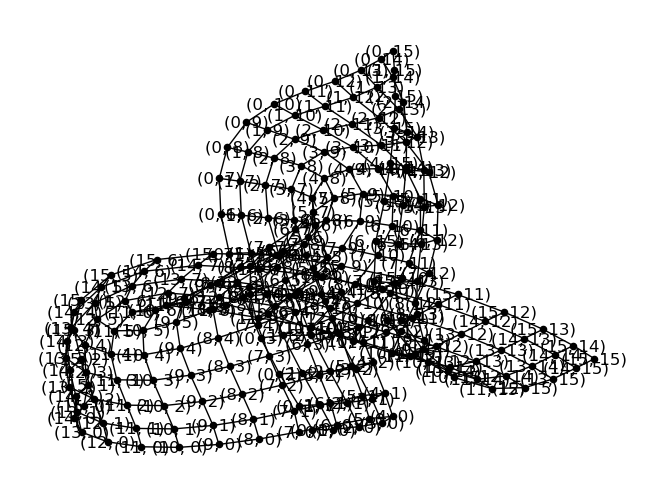

In [7]:
# make the full grid of edges
for row in range(maxrows+1):
    for col in range(maxcolumns+1):
        if row != 0:  # if not the very top row, make a connection between current node and the one above
            up_row = row - 1
            G.add_edge((row, col), (up_row, col))
        if row != (maxrows):  # if not the very bottom row, make a connection between current node and the one below
            down_row = row + 1
            G.add_edge((row, col), (down_row, col))
        if col != 0:  # if not the leftmost column, make a connection between current node and the one to the left
            left_col = col - 1
            G.add_edge((row, col), (row, left_col))
        if col != maxcolumns:  # if not the rightmost column, make a connection between current node and the one to the right
            right_col = col + 1
            G.add_edge((row, col), (row, right_col))

nx.draw_spring(G, with_labels=True, font_color="k", node_size=20, node_color="k")

In [8]:
G.remove_nodes_from([coord for coord in dictionary if dictionary[coord] == "#"])

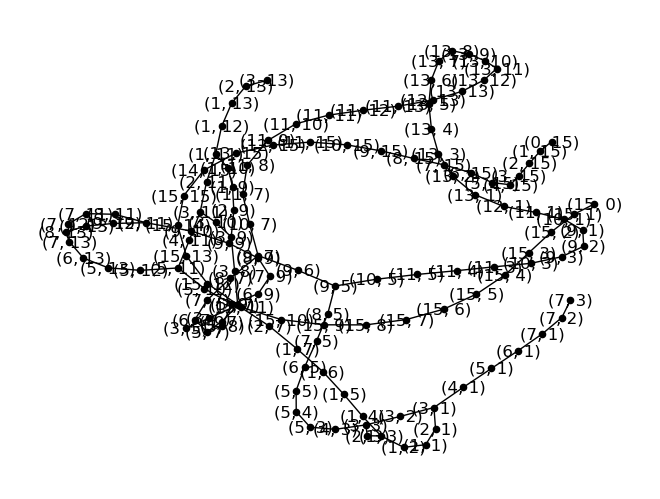

In [9]:
nx.draw_spring(G, with_labels=True, font_color="k", node_size=20, node_color="k")

In [10]:
nx.shortest_path_length(G, source=start, target=end)

28

In [11]:
print([p for p in nx.all_shortest_paths(G, source=(1,13), target=(13,1))])

[[(1, 13), (1, 12), (1, 11), (1, 10), (1, 9), (2, 9), (3, 9), (3, 8), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7), (9, 6), (9, 5), (10, 5), (11, 5), (11, 4), (11, 3), (10, 3), (9, 3), (9, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(1, 13), (1, 12), (1, 11), (2, 11), (3, 11), (3, 10), (3, 9), (3, 8), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7), (9, 6), (9, 5), (10, 5), (11, 5), (11, 4), (11, 3), (10, 3), (9, 3), (9, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(1, 13), (1, 12), (1, 11), (2, 11), (3, 11), (4, 11), (5, 11), (5, 10), (5, 9), (5, 8), (5, 7), (6, 7), (7, 7), (8, 7), (9, 7), (9, 6), (9, 5), (10, 5), (11, 5), (11, 4), (11, 3), (10, 3), (9, 3), (9, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]]


In [12]:
for x,y in nx.shortest_path(G, source=(1,13), target=(13,1)):
    dictionary[(x,y)] = "O"

In [13]:
# visualise
def print_map():
    for y in range(maxrows):
        string = ''
        for x in range(maxcolumns):
            string = string + dictionary[(x,y)]
        print(string)
print_map()

###############
#.......#OOOOO#
#.#.###.#O###.#
#.....#.#OOO#.#
#.###.#####O#.#
#.#.#....OOO#.#
#.#.#####O###.#
#..OOOOOOO..#.#
###O#.#####.#.#
#OOO#.....#.#.#
#O#.#.###.#.#.#
#O....#...#.#.#
#O###.#.#.#.#.#
#O..#.....#...#
###############


### Figure out how to add in the weights

In [15]:
G.clear()

In [16]:
wall = [coord for coord in dictionary if dictionary[coord] == "#"]

In [17]:
# need to start with the nodes labelled by coordinate AND direction, effectively making four layers
for row in range(maxrows+1):
    for col in range(maxcolumns+1):
        if (col, row) in wall:  # don't create a node where there is a wall
            continue
        for dir in ["up", "down", "right", "left"]:
            G.add_node(((col, row), dir))
G.number_of_nodes()

540

In [ ]:
G.nodes

In [19]:
# go through every point/coordinate
for coords, dir in G.nodes:
    x, y = coords

    # figure out the next coordinates we'll hit
    if dir == "up":
        next_coords = (x, y-1)
    elif dir == "down":
        next_coords = (x, y+1)
    elif dir == "left":
        next_coords = (x-1, y)
    elif dir == "right":
        next_coords = (x+1, y)

    # check those coordinates are in bounds of the grid
    if (next_coords, dir) in G.nodes:
        # create a weight 1 path when going in the same direction
        G.add_edge((coords, dir), (next_coords, dir), weight=1)

    # make a weight 1000 path between the direction layers
    for new_dir in ["up", "down", "right", "left"]:
        G.add_edge((coords, dir), (coords, new_dir), weight=1000)

In [20]:
G.number_of_edges()

1630

In [21]:
# need to be able to end coming from any direction so create a phantom end node
for dir in ["up", "down", "right", "left"]:
    G.add_edge((end, dir), "end node", weight=0)

In [22]:
nx.dijkstra_path_length(G, source=(start, "right"), target="end node")

7036

In [23]:
nx.dijkstra_path(G, source=(start, "right"), target="end node")

[((1, 13), 'right'),
 ((1, 13), 'up'),
 ((1, 12), 'up'),
 ((1, 11), 'up'),
 ((1, 11), 'right'),
 ((2, 11), 'right'),
 ((3, 11), 'right'),
 ((4, 11), 'right'),
 ((5, 11), 'right'),
 ((5, 11), 'up'),
 ((5, 10), 'up'),
 ((5, 9), 'up'),
 ((5, 8), 'up'),
 ((5, 7), 'up'),
 ((5, 7), 'right'),
 ((6, 7), 'right'),
 ((7, 7), 'right'),
 ((8, 7), 'right'),
 ((9, 7), 'right'),
 ((10, 7), 'right'),
 ((11, 7), 'right'),
 ((11, 7), 'up'),
 ((11, 8), 'up'),
 ((11, 9), 'up'),
 ((11, 10), 'up'),
 ((11, 11), 'up'),
 ((11, 12), 'up'),
 ((11, 13), 'up'),
 ((11, 13), 'right'),
 ((12, 13), 'right'),
 ((13, 13), 'right'),
 ((13, 13), 'up'),
 ((13, 12), 'up'),
 ((13, 11), 'up'),
 ((13, 10), 'up'),
 ((13, 9), 'up'),
 ((13, 8), 'up'),
 ((13, 7), 'up'),
 ((13, 6), 'up'),
 ((13, 5), 'up'),
 ((13, 4), 'up'),
 ((13, 3), 'up'),
 ((13, 2), 'up'),
 ((13, 1), 'up'),
 'end node']

In [24]:
# visualise
# get map into dictionary form
dictionary = {}

for y, line in enumerate(map):
    for x, char in enumerate(line):
        if char == ".":
            dictionary[(x,y)] = " "
        else:
            dictionary[(x,y)] = char

list_of_path = nx.dijkstra_path(G, source=(start, "right"), target="end node")

for coords, dir in list_of_path[:-1]:  # miss off the phantom "end node"
    dictionary[coords] = "•"

def print_map():
    for y in range(maxrows):
        string = ''
        for x in range(maxcolumns):
            string = string + dictionary[(x,y)]
        print(string)
print_map()

###############
#       #    •#
# # ### # ###•#
#     # #   #•#
# ### ##### #•#
# # #       #•#
# # ##### ###•#
#    •••••••#•#
### #•#####•#•#
#   #•    #•#•#
# # #•### #•#•#
#•••••#   #•#•#
#•### # # #•#•#
#•  #     #•••#
###############


## Nice! Let's try the second example

In [26]:
with open("day_16_input_1.txt") as fname:
    map = fname.read()

In [27]:
map = map.splitlines()
map

['#################',
 '#...#...#...#..E#',
 '#.#.#.#.#.#.#.#.#',
 '#.#.#.#...#...#.#',
 '#.#.#.#.###.#.#.#',
 '#...#.#.#.....#.#',
 '#.#.#.#.#.#####.#',
 '#.#...#.#.#.....#',
 '#.#.#####.#.###.#',
 '#.#.#.......#...#',
 '#.#.###.#####.###',
 '#.#.#...#.....#.#',
 '#.#.#.#####.###.#',
 '#.#.#.........#.#',
 '#.#.#.#########.#',
 '#S#.............#',
 '#################']

In [28]:
maxcolumns = len(map[0])
maxrows = len(map)
print(maxcolumns,maxrows)

17 17


In [29]:
# get map into dictionary form
dictionary = {}

for y, line in enumerate(map):
    for x, char in enumerate(line):
        dictionary[(x,y)] = char

In [30]:
# find the start
x, y = [coord for coord in dictionary if dictionary[coord] == "S"][0]
start = (x,y)
print(start)

# find the end
x, y = [coord for coord in dictionary if dictionary[coord] == "E"][0]
end = (x,y)
print(end)

(1, 15)
(15, 1)


In [31]:
G.clear()

In [32]:
wall = [coord for coord in dictionary if dictionary[coord] == "#"]
# need to start with the nodes labelled by coordinate AND direction, effectively making four layers
for row in range(maxrows+1):
    for col in range(maxcolumns+1):
        if (col, row) in wall:  # don't create a node where there is a wall
            continue
        for dir in ["up", "down", "right", "left"]:
            G.add_node(((col, row), dir))
G.number_of_nodes()

668

In [33]:
# go through every point/coordinate
for coords, dir in G.nodes:
    x, y = coords

    # figure out the next coordinates we'll hit
    if dir == "up":
        next_coords = (x, y-1)
    elif dir == "down":
        next_coords = (x, y+1)
    elif dir == "left":
        next_coords = (x-1, y)
    elif dir == "right":
        next_coords = (x+1, y)

    # check those coordinates are in bounds of the grid
    if (next_coords, dir) in G.nodes:
        # create a weight 1 path when going in the same direction
        G.add_edge((coords, dir), (next_coords, dir), weight=1)

    # make a weight 1000 path between the direction layers
    for new_dir in ["up", "down", "right", "left"]:
        G.add_edge((coords, dir), (coords, new_dir), weight=1000)
G.number_of_edges()

2010

In [34]:
# need to be able to end coming from any direction so create a phantom end node
for dir in ["up", "down", "right", "left"]:
    G.add_edge((end, dir), "end node", weight=0)

In [35]:
nx.dijkstra_path_length(G, source=(start, "right"), target="end node")

11048

In [318]:
# visualise
# get map into dictionary form
dictionary = {}

for y, line in enumerate(map):
    for x, char in enumerate(line):
        if char == ".":
            dictionary[(x,y)] = " "
        else:
            dictionary[(x,y)] = char

list_of_path = nx.dijkstra_path(G, source=(start, "right"), target="end node")

for coords, dir in list_of_path[:-1]:  # miss off the phantom "end node"
    dictionary[coords] = "•"

def print_map():
    for y in range(maxrows):
        string = ''
        for x in range(maxcolumns):
            string = string + dictionary[(x,y)]
        print(string)
print_map()

#################
#   #   #   #  •#
# # # # # # # #•#
# # # #   #   #•#
# # # # ### # #•#
#•••# # #     #•#
#•#•# # # #####•#
#•#•  # # #•••••#
#•#•##### #•### #
#•#•#  •••••#   #
#•#•###•##### ###
#•#•#•••#     # #
#•#•#•##### ### #
#•#•#•        # #
#•#•#•######### #
#•#•••          #
#################


## We got the right answer! On to Part 1

In [ ]:
G.clear()

with open("day_16_input_2.txt") as fname:
    map = fname.read()
map = map.splitlines()
maxcolumns = len(map[0])
maxrows = len(map)
dictionary = {}

for y, line in enumerate(map):
    for x, char in enumerate(line):
        dictionary[(x,y)] = char

x, y = [coord for coord in dictionary if dictionary[coord] == "S"][0]
start = (x,y)

x, y = [coord for coord in dictionary if dictionary[coord] == "E"][0]
end = (x,y)

wall = [coord for coord in dictionary if dictionary[coord] == "#"]

for row in range(maxrows):
    for col in range(maxcolumns):
        if (col, row) in wall:  # don't create a node where there is a wall
            continue
        for dir in ["up", "down", "right", "left"]:
            G.add_node(((col, row), dir))

for coords, dir in G.nodes:
    x, y = coords

    if dir == "up":
        next_coords = (x, y-1)
    elif dir == "down":
        next_coords = (x, y+1)
    elif dir == "left":
        next_coords = (x-1, y)
    elif dir == "right":
        next_coords = (x+1, y)

    if (next_coords, dir) in G.nodes:
        G.add_edge((coords, dir), (next_coords, dir), weight=1)

    for new_dir in ["up", "down", "right", "left"]:
        G.add_edge((coords, dir), (coords, new_dir), weight=1000)

for dir in ["up", "down", "right", "left"]:
    G.add_edge((end, dir), "end node", weight=0)

nx.dijkstra_path_length(G, source=(start, "right"), target="end node")

In [ ]:
dictionary = {}

for y, line in enumerate(map):
    for x, char in enumerate(line):
        if char == ".":
            dictionary[(x,y)] = " "
        else:
            dictionary[(x,y)] = char

list_of_path = nx.dijkstra_path(G, source=(start, "right"), target="end node")

for coords, dir in list_of_path[:-1]:  # miss off the phantom "end node"
    dictionary[coords] = "•"

for y in range(maxrows):
    string = ''
    for x in range(maxcolumns):
        string = string + dictionary[(x,y)]
    print(string)


In [322]:
G.number_of_nodes()

40449

In [323]:
G.number_of_edges()

121972

## Part 2

In [69]:
all_paths_list = nx.all_shortest_paths(G, source=(start, "right"), target="end node", weight="weight", method="dijkstra")

In [71]:
seats = set()

In [ ]:
for i, path in enumerate(all_paths_list):
    print(i)
    if i == 100: break

In [ ]:
len(seats)-1

In [81]:
path

[((1, 15), 'right'),
 ((1, 15), 'down'),
 ((1, 14), 'down'),
 ((1, 13), 'down'),
 ((1, 12), 'down'),
 ((1, 11), 'down'),
 ((1, 10), 'down'),
 ((1, 9), 'down'),
 ((1, 8), 'down'),
 ((1, 7), 'down'),
 ((1, 6), 'down'),
 ((1, 5), 'down'),
 ((1, 5), 'right'),
 ((2, 5), 'right'),
 ((3, 5), 'right'),
 ((3, 5), 'down'),
 ((3, 6), 'down'),
 ((3, 7), 'down'),
 ((3, 8), 'down'),
 ((3, 9), 'down'),
 ((3, 10), 'down'),
 ((3, 11), 'down'),
 ((3, 12), 'down'),
 ((3, 13), 'down'),
 ((3, 14), 'down'),
 ((3, 15), 'down'),
 ((3, 15), 'left'),
 ((4, 15), 'left'),
 ((5, 15), 'left'),
 ((5, 15), 'up'),
 ((5, 14), 'up'),
 ((5, 13), 'up'),
 ((5, 13), 'right'),
 ((6, 13), 'right'),
 ((7, 13), 'right'),
 ((8, 13), 'right'),
 ((9, 13), 'right'),
 ((10, 13), 'right'),
 ((11, 13), 'right'),
 ((11, 13), 'down'),
 ((11, 12), 'down'),
 ((11, 11), 'down'),
 ((11, 11), 'right'),
 ((12, 11), 'right'),
 ((13, 11), 'right'),
 ((13, 11), 'up'),
 ((13, 10), 'up'),
 ((13, 9), 'up'),
 ((13, 9), 'right'),
 ((14, 9), 'right'),

In [83]:
# visualise
# get map into dictionary form
dictionary = {}

for y, line in enumerate(map):
    for x, char in enumerate(line):
        if char == ".":
            dictionary[(x,y)] = " "
        else:
            dictionary[(x,y)] = char

list_of_path = path

for coords, dir in list_of_path[:-1]:  # miss off the phantom "end node"
    dictionary[coords] = "•"

def print_map():
    for y in range(maxrows):
        string = ''
        for x in range(maxcolumns):
            string = string + dictionary[(x,y)]
        print(string)
print_map()

#################
#   #   #   #  •#
# # # # # # # #•#
# # # #   #   #•#
# # # # ### # #•#
#•••# # #     #•#
#•#•# # # #####•#
#•#•  # # #    •#
#•#•##### # ###•#
#•#•#       #•••#
#•#•### #####•###
#•#•#   #  •••# #
#•#•# #####•### #
#•#•#•••••••  # #
#•#•#•######### #
#•#•••          #
#################


In [ ]:
## There is a problem with the UP and DOWN layers being equivalent, leading to MANY more solutions than just the paths